# Risk1 probability plots

John Curtin

## Overview

This script makes faceted histograms that display the probabilities of lapse separately for true lapse and no lapse observations.

The data are from the EMA study based on RISK1 project

## Set up environment

In [ ]:
# handle conflicts
options(conflicts.policy = "depends.ok")

library(tidyverse, quietly = TRUE)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

ℹ SHA-1 hash of file is "a58e57da996d1b70bb9a5b58241325d6fd78890f"

## Open preds dfs

In [ ]:
preds_week<- read_rds(file.path(path_models, 
                               "outer_preds_1week_0_v5_nested_main.rds"))
preds_day<- read_rds(file.path(path_models, 
                              "outer_preds_1day_0_v5_nested_main.rds"))
preds_hour<- read_rds(file.path(path_models, 
                               "outer_preds_1hour_0_v5_nested_main.rds")) 


## Function for faceted probability plot

In [ ]:
plot_probs <- function(df_preds, model) {
  bar_color <- 
    case_when(
      tolower(model) == "week" ~ "orange",
      tolower(model) == "day" ~ "green",
      tolower(model) == "hour" ~ "blue",
    )
  df_preds |> 
    ggplot(data = _, aes(x = prob_beta)) + 
     geom_histogram(bins = 15, fill = bar_color, col = "black", alpha = .4) +
     facet_wrap(~label, nrow = 2, scales = "free_y") +
     xlab("P(Lapse | X)") +
    scale_y_continuous(labels = scales::comma)
}


# Plots

One week window with no vertical line for decision threshold

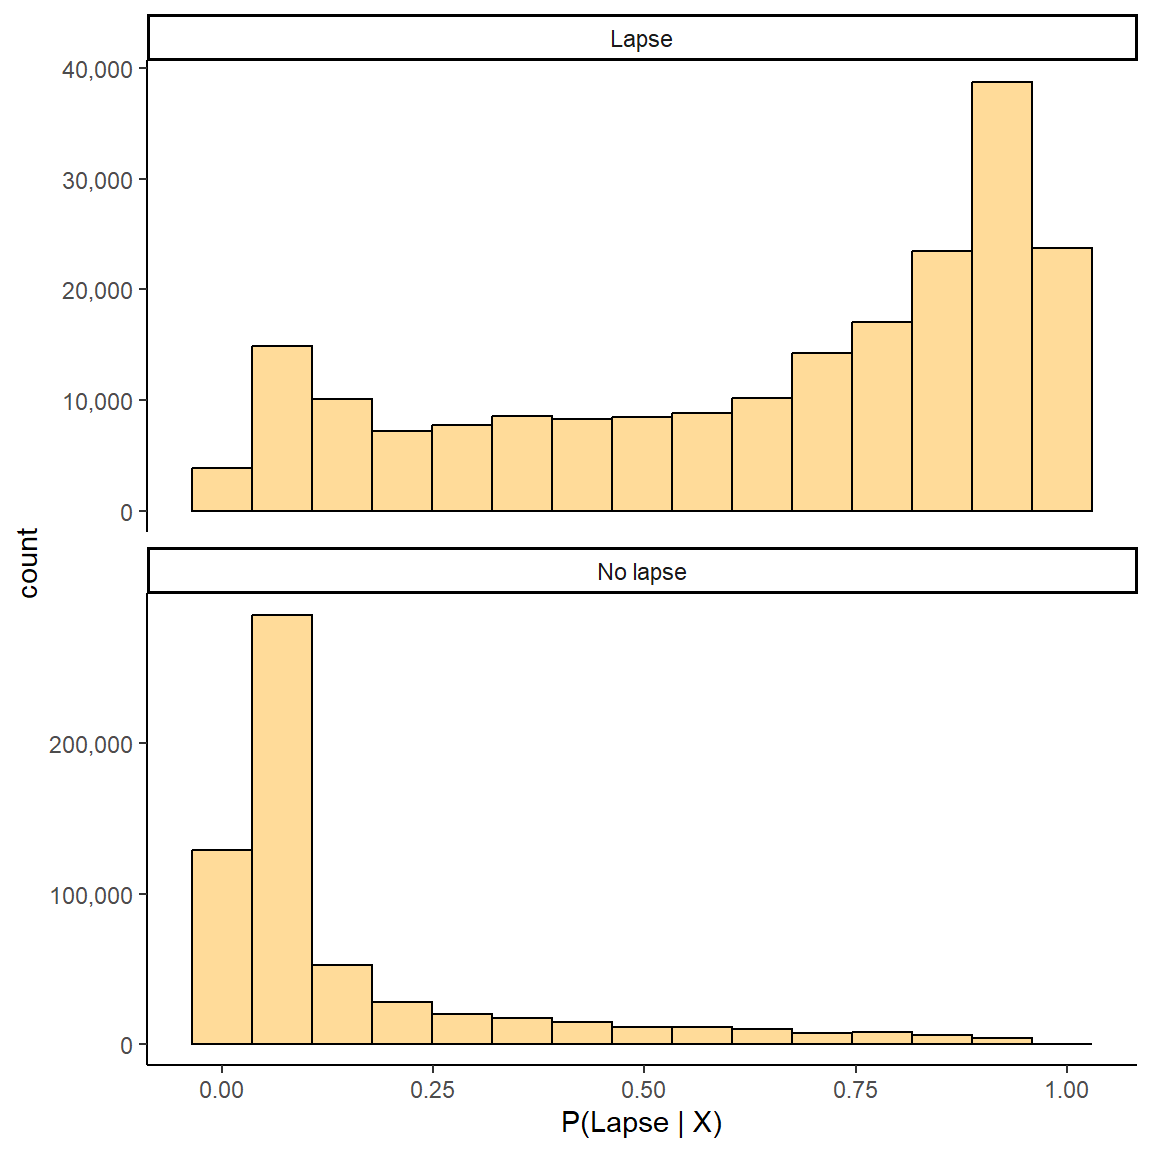

In [ ]:

fig_week <- preds_week |> 
  plot_probs("week")

fig_week


One week window with vertical line for default decision threshold

ℹ Please use `linewidth` instead.

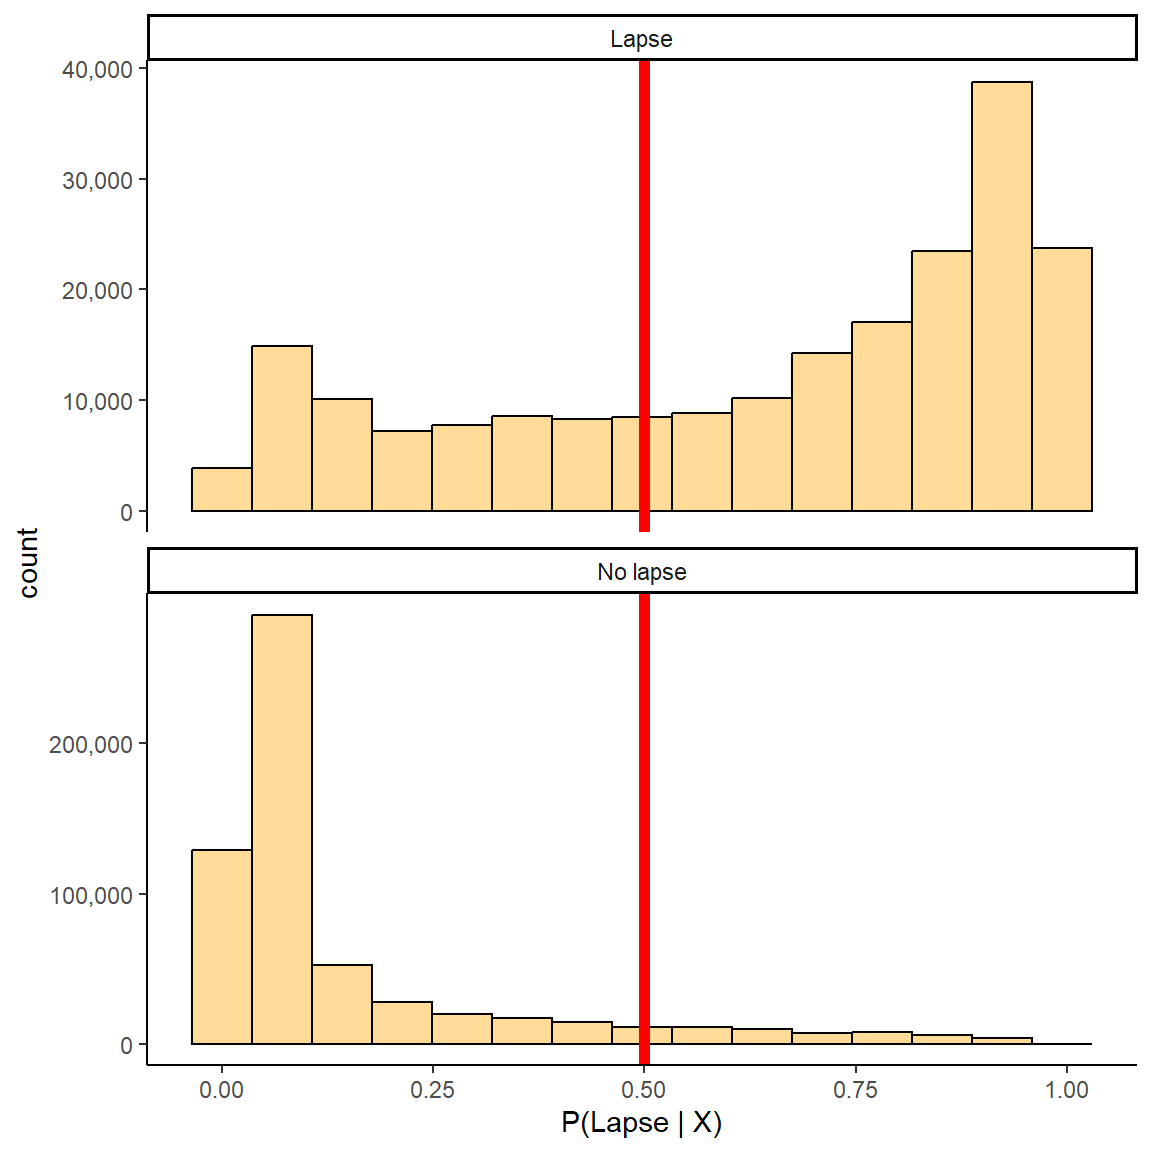

In [ ]:

fig_week +
  geom_vline(xintercept = .5, color = "red", size = 2)


One day window with vertical line for default decision threshold

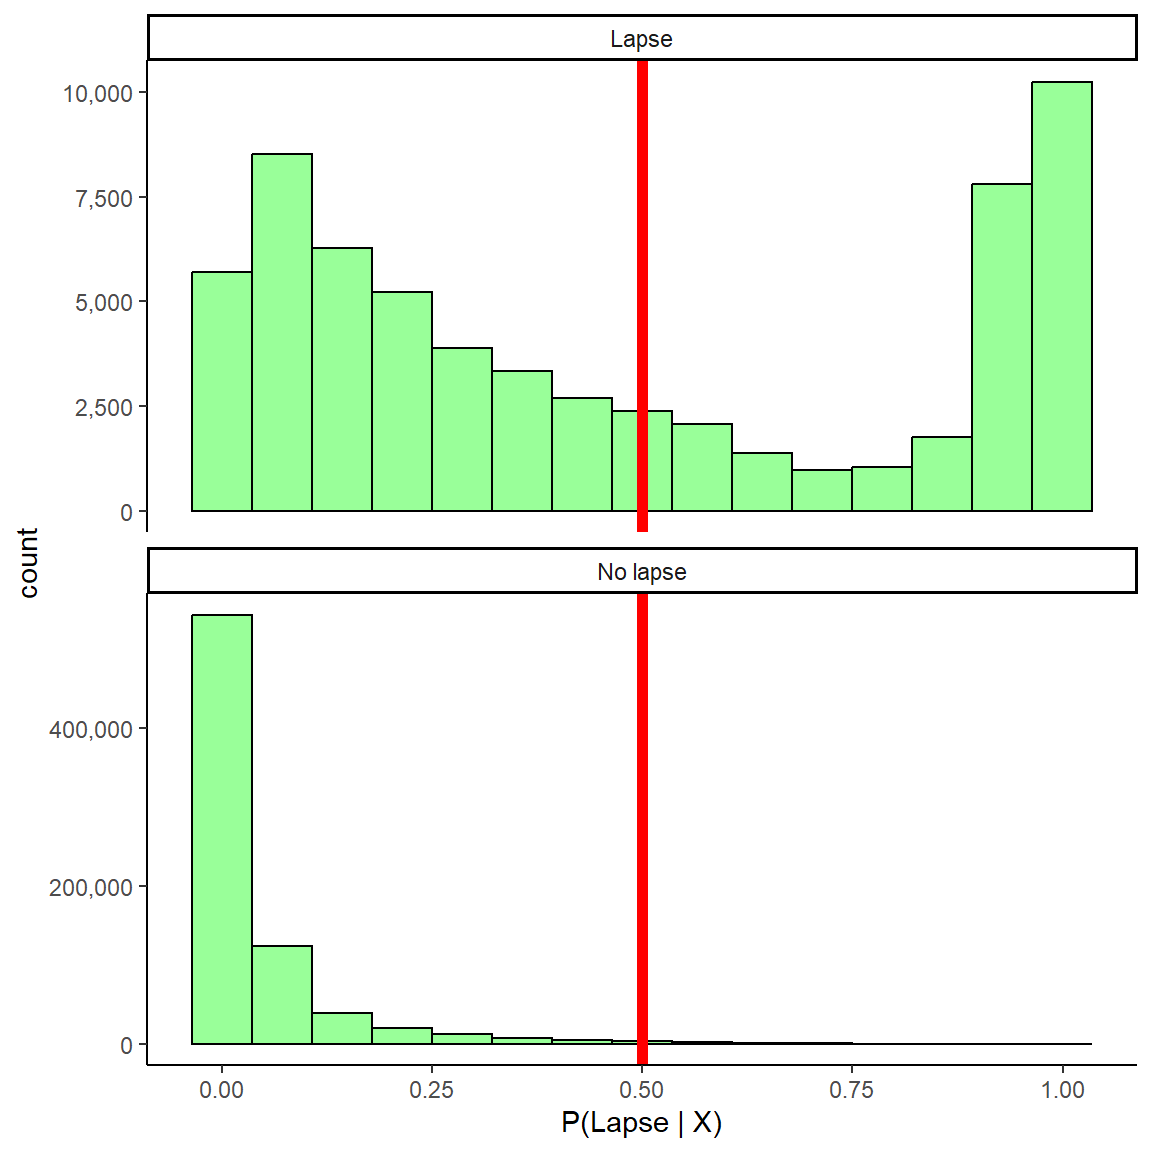

In [ ]:

fig_day <- preds_day |> 
 plot_probs("day")
 
fig_day +
   geom_vline(xintercept = .5, color = "red", linewidth = 2)


One day window with vertical line for high (p = 0.9) decision threshold

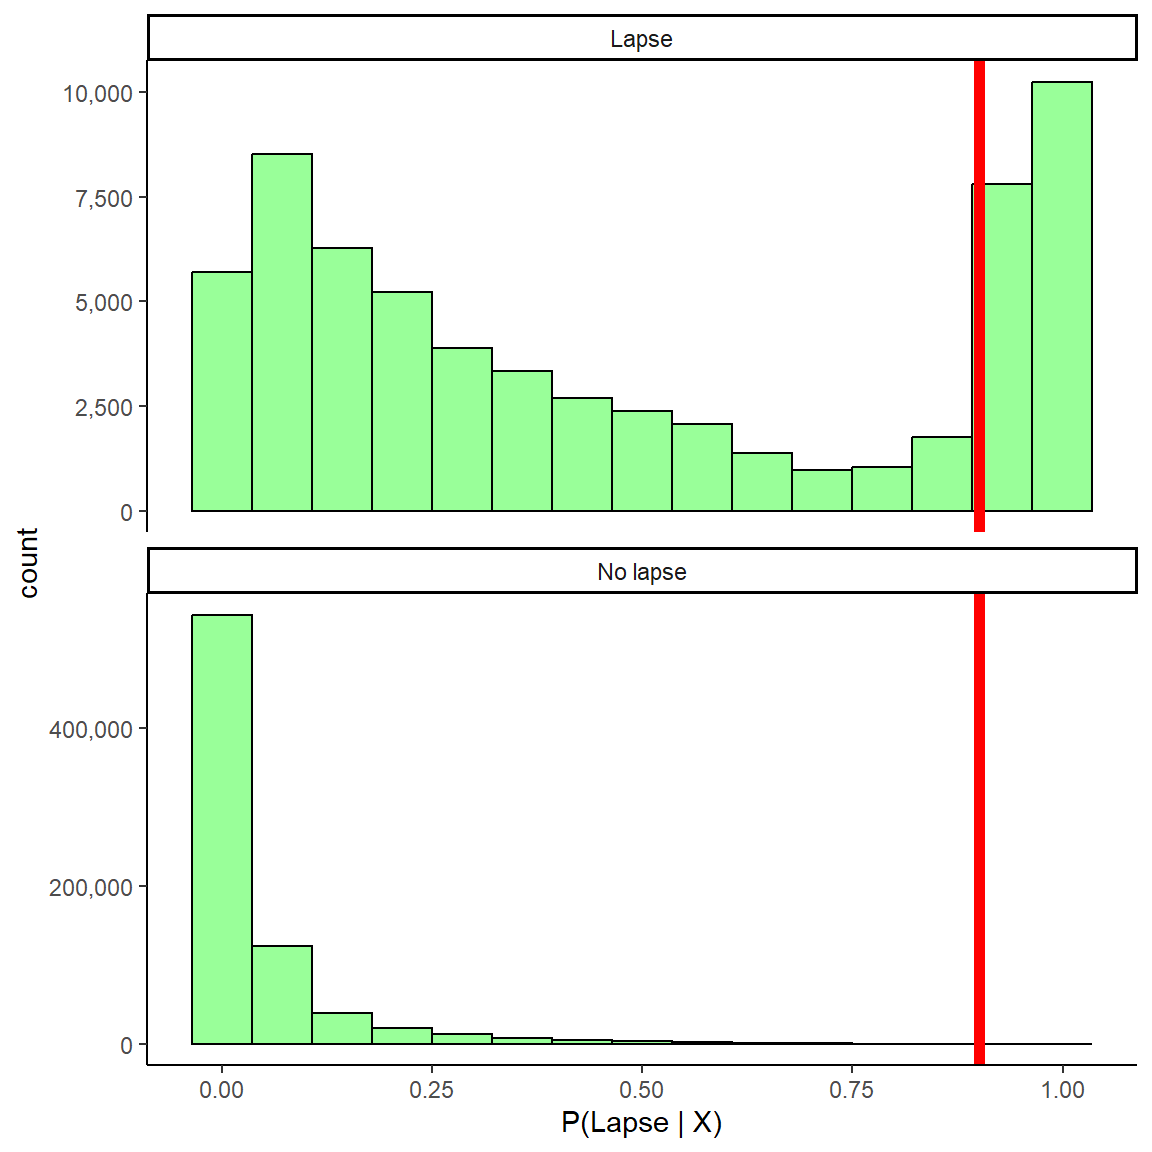

In [ ]:

fig_day +
  geom_vline(xintercept = .9, color = "red", linewidth = 2)
